# Customer segmentation of the Olist E-Commerce site

## Context
 - Olist is the largest e-commerce platform in Brazilian online marketplaces which connects and offers a solution for buying and selling on online. 
 - Olist wants to obtain a segmentation of its customers that their marketing team can use in their daily communication campaigns. 
 - The dataset provided by Olist has information of ~100k customers and sellers from 2016 to 2018 made at multiple marketplaces. 

## Goal:
 - To understand the different types of users through their behavior and anonymized personal data.

## Objectives:
 My mission is to to help Olist teams understand the different types of users. Thus, I will use unsupervised methods to:
 - provide an actionable description of segmentation and its underlying logic for optimal use. 
 - provide an analysis of the stability of the segments over time in order to establish a maintenance contract.
 - group together customers with similar profiles that can be used by the marketing team for better communication.

### Part 1
 - **Data preparation and cleaning, exploratory analyses, and feature engineering**

## 1.0 Import Libraries

In [1]:
# import libraries for data manipulation and visualization

import pandas as pd # for data loading, manipulation, and exploration
import numpy as np # for linear algebra/vector arithmetic
from datetime import datetime as dt # Handling dates and timestamps

# statistical data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st 
from math import radians, cos, sin, asin, sqrt

from sklearn.metrics.pairwise import haversine_distances

# allow plot to appear within the notebook
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## 2.0 Load and read datasets

#### 2.1 Loading of the datasets

In [2]:
# Read datasets into dataframes
Customers = pd.read_csv('olist_customers_dataset.csv')
Geolocation = pd.read_csv('olist_geolocation_dataset.csv')
Items = pd.read_csv('olist_order_items_dataset.csv')
Payments = pd.read_csv('olist_order_payments_dataset.csv')
Reviews = pd.read_csv('olist_order_reviews_dataset.csv')
Products = pd.read_csv('olist_products_dataset.csv', engine='python')
Sellers = pd.read_csv('olist_sellers_dataset.csv')
Product_category = pd.read_csv('product_category_name_translation.csv')
Orders = pd.read_csv('olist_orders_dataset.csv')

#### 2.2 Display the top five rows of each dataset and check qualities of the datasets

#### 2.2.1 Customers

In [3]:
# view the first 5 rows of the dataset
Customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# General overview of the dataset
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


The customers dataset:
  - contains 99441 rows and 5 columns
  - does not contain any missing value

In [5]:
# check for duplicated rows
print(f"Number of duplicated rows:{Customers.duplicated().sum()}")

Number of duplicated rows:0


In [6]:
# Check for unique values
print(f"Number of unique values in each variable: \n{Customers.nunique()}")

Number of unique values in each variable: 
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64


 - The customers dataset contains 96096 unique customers with 99441 transactions from 27 states and 4119 cities

#### 2.2.2 Geolocation

In [7]:
Geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
Geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


The geolocation dataset:
 - contains 1000163 rows and 5 columns
 - does not contain any missing value

In [9]:
Geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [10]:
Geolocation.duplicated().sum()

261831

#### 2.2.3 Items

In [11]:
Items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
Items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


The Items dataset:
 - contains 112650 rows and 7 columns
 - does not contain any missing value

In [13]:
Items.duplicated(subset=['order_id', 'product_id', 'order_item_id']).sum()

0

#### 2.2.4 Payments

In [14]:
Payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


The Items dataset:
 - contains 103886 rows and 5 columns
 - does not contain any missing value

In [16]:
Payments.duplicated().sum()

0

In [17]:
# Check for unique values
print(f"Number of unique values in each variable: \n{Payments.nunique()}")

Number of unique values in each variable: 
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64


#### 2.2.5 Reviews

In [18]:
Reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


The Reviews dataset:
 - contains 99224 rows and 7 columns
 - review_comment_title and review_comment_message contain thousands of missing values

In [20]:
#Select only relevant columns

Reviews = Reviews[['order_id', 'review_score']]

#### 2.2.6 Products and Product categories

In [21]:
Products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [22]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
Product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
Product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [25]:
#merge Products and Product_info
Product_details = pd.merge(Products, Product_category,  on='product_category_name')

# select important columns
Product = Product_details[['product_id', 'product_category_name_english']]

#### 2.2.7 Sellers

In [26]:
Sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [28]:
Sellers['seller_state'].nunique()

23

#### 2.2.8 Orders

In [29]:
Orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


The Orders dataset:
 - contains 99441 rows and 8 columns
 - the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date features contain hundreads and a few thousands of missing values

In [31]:
Orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Replacing Missing values

In [32]:
# Replace NaN in order_approved_at with corresponding values in order_purchase_timestamp
Orders['order_approved_at'] = Orders['order_approved_at'].fillna(Orders['order_purchase_timestamp'])

# Replace NaN in order_delivered_customer_date with corresponding values in order_estimated_delivery_date
Orders['order_delivered_customer_date'] = Orders['order_delivered_customer_date'].fillna(Orders['order_estimated_delivery_date'])

# drop the order_delivered_carrier_date columnn since it is not important in the goal of this project
Orders.drop('order_delivered_carrier_date', axis = 1, inplace = True)

In [33]:
Orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [34]:
Orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

## 3.0 Data Integration
 - creation of command and client's datasets

### 3.1 Command file

In [35]:
Data = pd.merge(Orders, Items, on = 'order_id') # merge Order and Item files on 'order_id'
Data = pd.merge(Data, Payments, on = 'order_id') # add payment file to the merged data
Data = pd.merge(Data, Reviews, on = 'order_id') # add Reviews file to the merged data
Command_df = pd.merge(Data, Product, on = 'product_id') # add product file to the merged data

#### 3.1.1 Feature Engineering and Exploratory Analysis

In [36]:
# Convert timestamps to daytime

time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for t in time:
    Command_df[t] = pd.to_datetime(Command_df[t])

#Convert order_purchase_timestamp to daytime
#Orders['date_order'] = pd.to_datetime(Orders['order_purchase_timestamp'])

Command_df['purchase_year'] = Command_df['order_purchase_timestamp'].dt.year
Command_df['purchase_month'] = Command_df['order_purchase_timestamp'].dt.month
Command_df['purchase_day'] = Command_df['order_purchase_timestamp'].dt.day
#Orders['purchase_hour'] = Orders['order_purchase_timestamp'].dt.hour

# Number of delivery days
Command_df['delivery_days'] = (Command_df['order_delivered_customer_date'] 
                                - Command_df['order_purchase_timestamp']).dt.days

# Number of delayed delivery days 
Command_df['delayed_delivery'] = (Command_df['order_delivered_customer_date'] 
                                - Command_df['order_estimated_delivery_date']).dt.days

# Number of days of last order
Command_df['last_purchase'] = (Command_df['order_purchase_timestamp'].max() - Command_df['order_purchase_timestamp']).dt.days

#adding column for month name and year 
Command_df['purchase_period'] = Command_df['order_purchase_timestamp'].dt.strftime('%b-%Y')

In [37]:
# Drop unnecessary columns
un_cols = ['product_id', 'shipping_limit_date', 'order_approved_at', 'order_delivered_customer_date',
           'order_estimated_delivery_date']
Command_df.drop(un_cols, axis = 1, inplace = True)

***Distribution of total Orders***

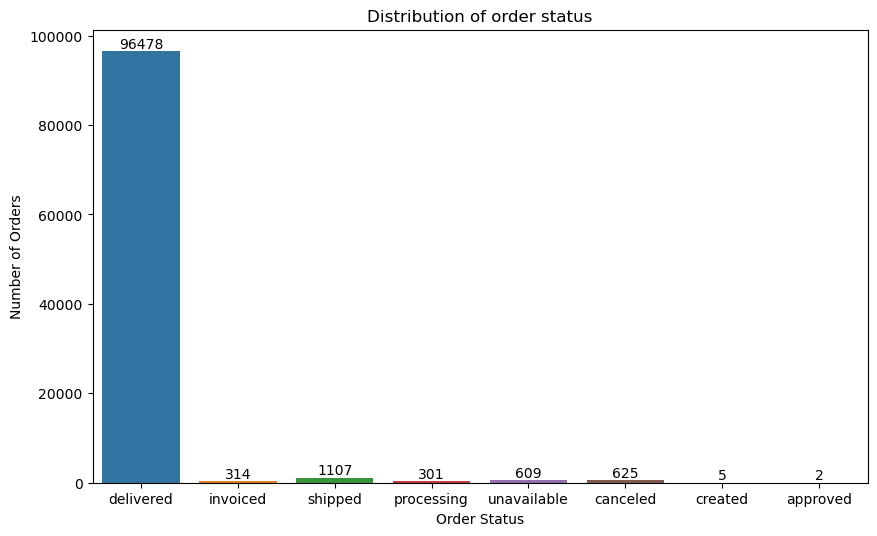

In [38]:
#countplot(Orders, 'order_status')
plt.figure(figsize=(10,6), dpi = 100)
ax= sns.countplot(data=Orders, x='order_status')
plt.ylabel('Number of Orders')
plt.xlabel('Order Status')
ax.bar_label(ax.containers[0], label_type='edge', color='black')
plt.title('Distribution of order status')
plt.show()

About 97% of the orders were delivered. So, we keep only delivered orders for analysis

***Keep only delivered orders***

In [39]:
Command_df = Command_df[Command_df["order_status"] == "delivered"]

#drop the order_status column
Command_df.drop("order_status", axis = 1, inplace = True)

***Distribution of number of days to deliver an order***

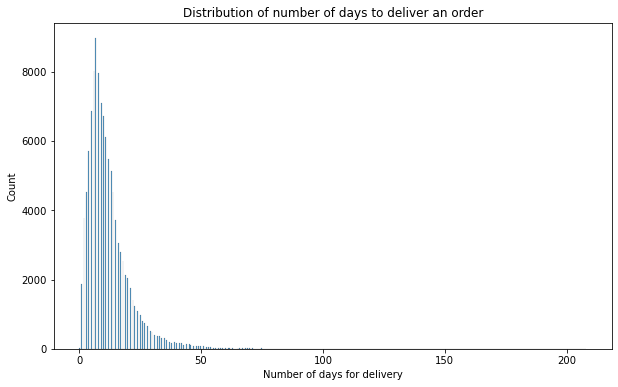

In [40]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=Command_df, x='delivery_days')
plt.xlabel('Number of days for delivery')
plt.title('Distribution of number of days to deliver an order')
plt.show()

***Number of delayed orders***

In [41]:
# Keep only positive numbers for delayed days and replace negative values (not delayed) with 0
Command_df.loc[Command_df['delayed_delivery'] < 0, 'delayed_delivery'] = 0

In [42]:
delayed_orders = Command_df[Command_df['delayed_delivery'] > 0]
len(delayed_orders)

7246

In [43]:
percent_delayed = len(delayed_orders)*100/len(Command_df)
print("Percentage of delayed order is: %.3f" % percent_delayed + '%')

Percentage of delayed order is: 6.400%


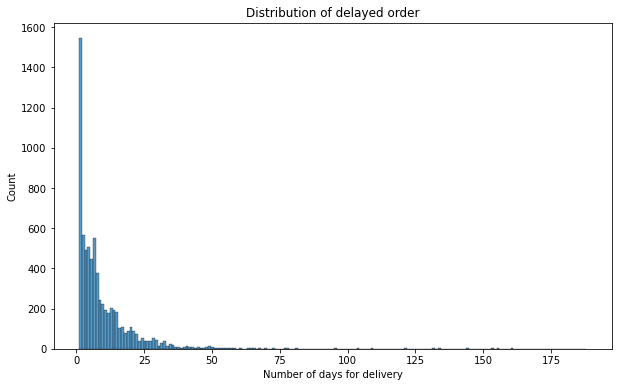

In [44]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=delayed_orders, x='delayed_delivery')
plt.xlabel('Number of days for delivery')
plt.title('Distribution of delayed order')
plt.show()

 - Only 7.287% of the orders experienced delayed delivery

***Distribution of orders by days of the week***

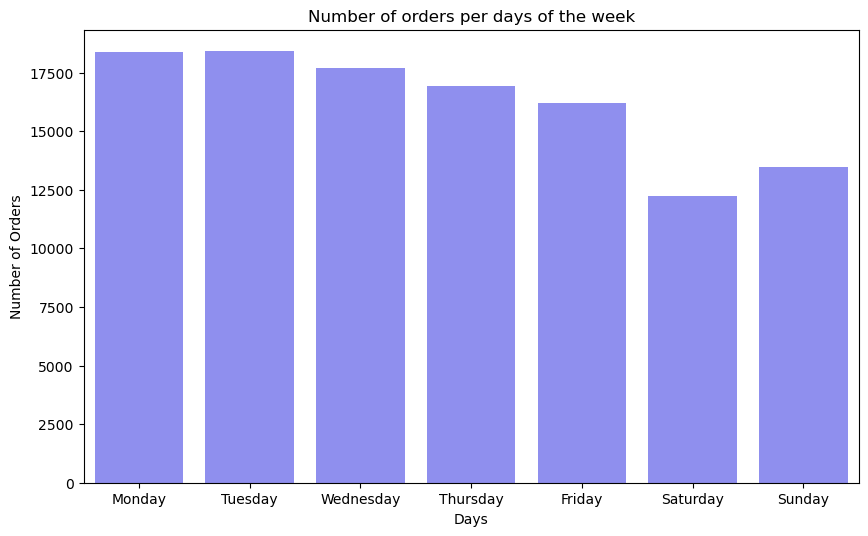

In [45]:
Command_df['days_of_week'] = Command_df['order_purchase_timestamp'].dt.dayofweek

def countplot(Data, column):
    plt.figure(figsize=(10,6), dpi = 100)
    sns.countplot(data=Data, x=column, color = 'blue', alpha = 0.5)
    plt.xlabel(column)
    return countplot

countplot(Command_df, 'days_of_week')
plt.ylabel('Number of Orders')
plt.xlabel('Days')
plt.title('Number of orders per days of the week')
plt.xticks(np.arange(0,7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show() 

***Number of orders by month***

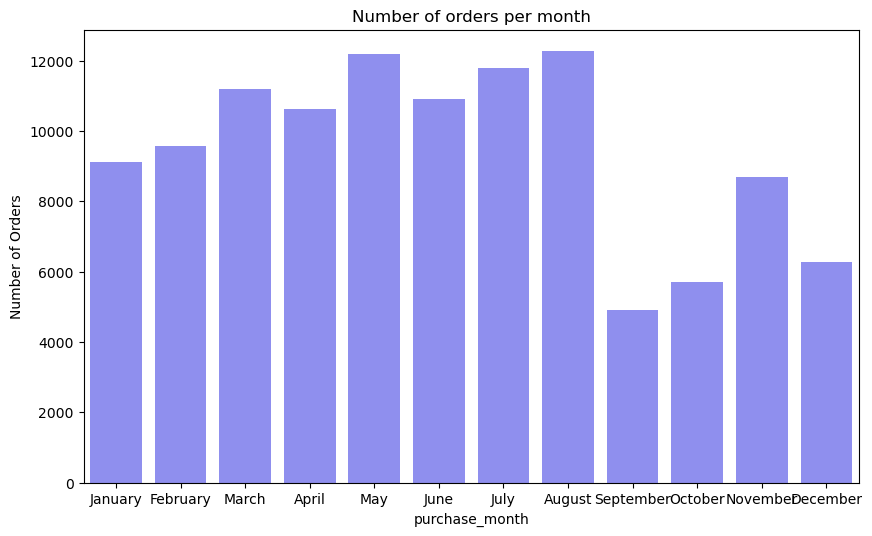

In [46]:
countplot(Command_df, 'purchase_month')
plt.ylabel('Number of Orders')
plt.title('Number of orders per month')
plt.xticks(np.arange(0,12), ['January','February','March','April','May','June', 'July','August',
                             'September','October','November','December']) 
plt.show()  

***Number of orders per year***

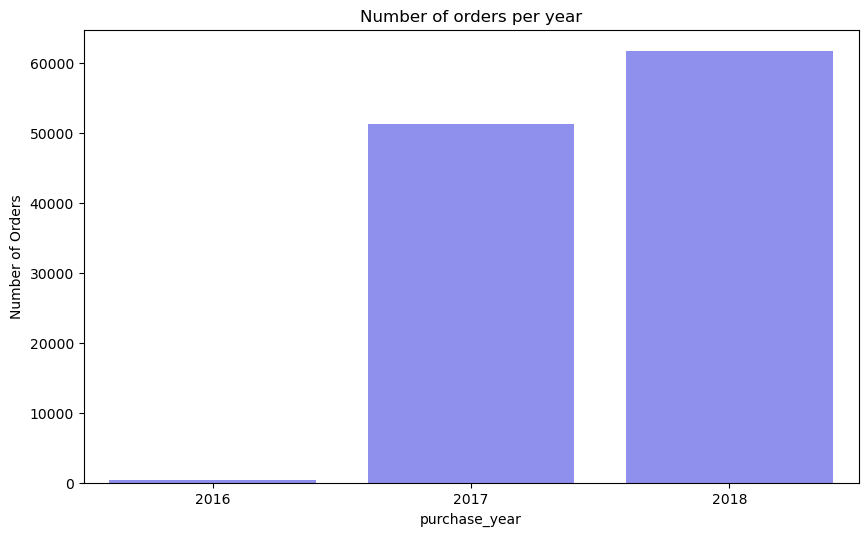

In [47]:
countplot(Command_df, 'purchase_year')
plt.ylabel('Number of Orders')
plt.title('Number of orders per year')
plt.show()  

***Evolution of monthly orders from 2016-2018***

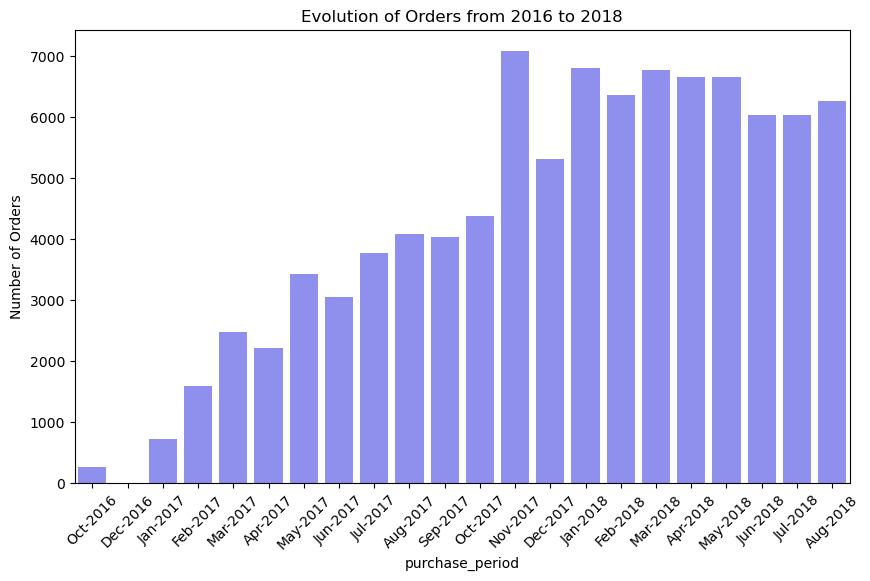

In [48]:
Command_df_period = Command_df.groupby('order_purchase_timestamp').agg({'order_id':'count', 'purchase_period':'min'}).reset_index()

countplot(Command_df_period, 'purchase_period')
plt.ylabel('Number of Orders')
plt.title('Evolution of Orders from 2016 to 2018')
plt.xticks(rotation = 45)
plt.show()  

***Payment type by customers***

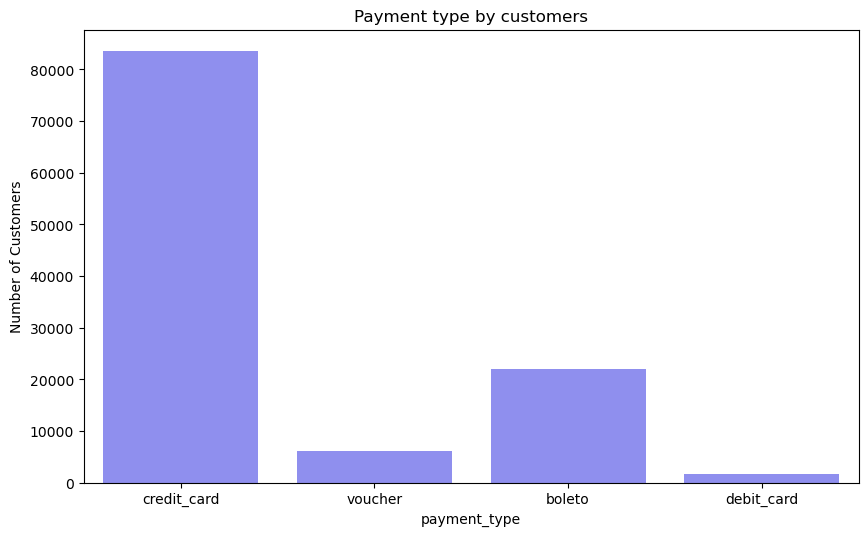

In [49]:
countplot(Command_df, 'payment_type')
plt.ylabel('Number of Customers')
plt.title('Payment type by customers')
plt.show()  

***Distribution of total expenses by customers***

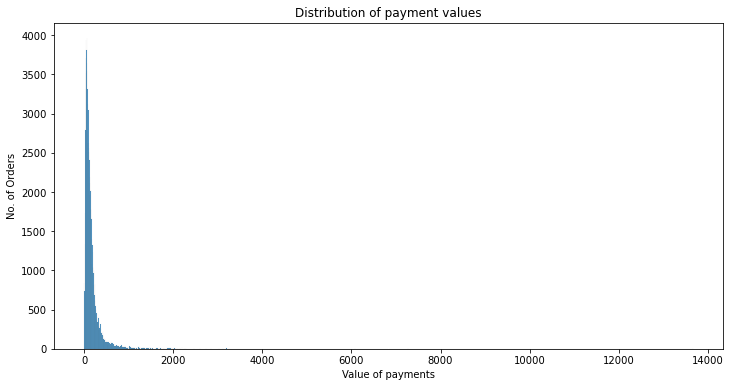

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(x='payment_value', data=Command_df)
plt.title('Distribution of payment values')
plt.xlabel('Value of payments')
plt.ylabel('No. of Orders')
plt.show()

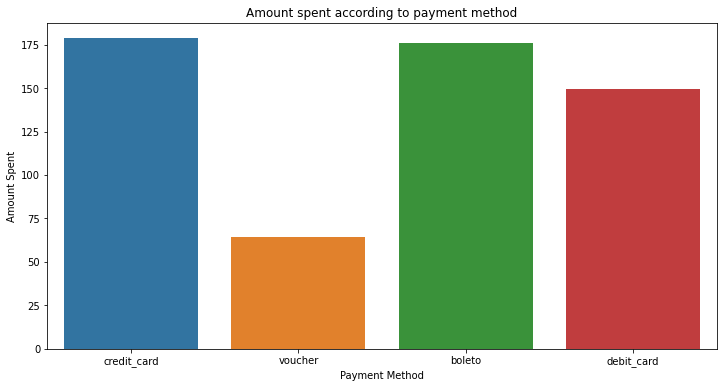

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x='payment_type', y='payment_value', data=Command_df, ci = None)
plt.title('Amount spent according to payment method')
plt.xlabel('Payment Method')
plt.ylabel('Amount Spent')
plt.show()

***Distribution of customers by number of payment installments***

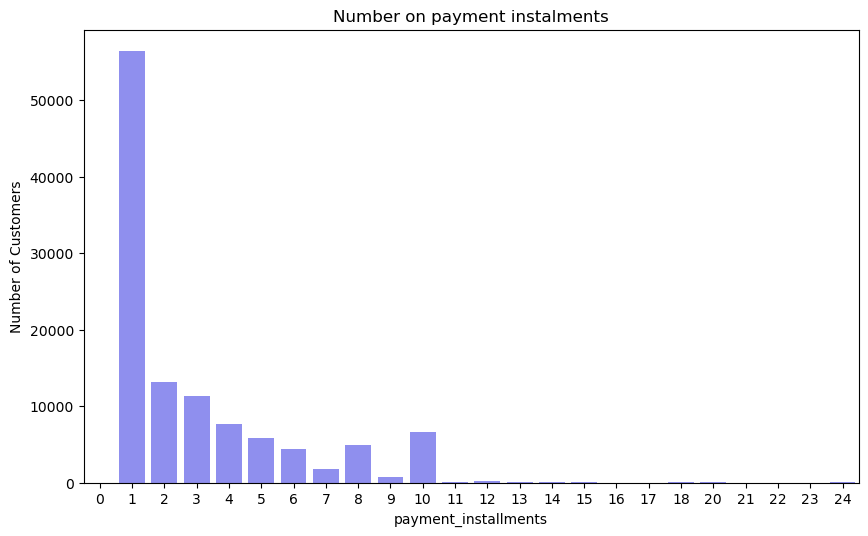

In [52]:
countplot(Command_df, 'payment_installments')
plt.ylabel('Number of Customers')
plt.title('Number on payment instalments')
plt.show()  

***Distribution of customers by total number of items ordered***

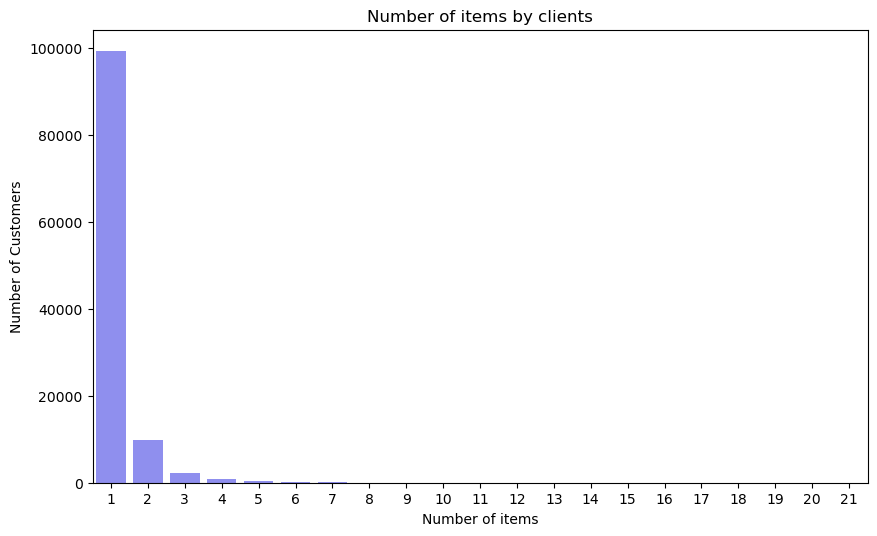

In [53]:
countplot(Command_df, 'order_item_id')
plt.xlabel('Number of items')
plt.ylabel('Number of Customers')
plt.title('Number of items by clients')
plt.show()  

In [54]:
more_items = Command_df[Command_df['order_item_id'] > 1]
len(more_items)

percent_more_items = round(len(more_items)*100/len(Command_df), 1)

print("Number of customers that bought more than 1 items are: %.3f" % len(more_items))
print("Percentage Number of customers that bought more than 1 orders is: %.3f" % percent_more_items + '%')

Number of customers that bought more than 1 items are: 14022.000
Percentage Number of customers that bought more than 1 orders is: 12.400%


***Top 10 products purchased by the customers***

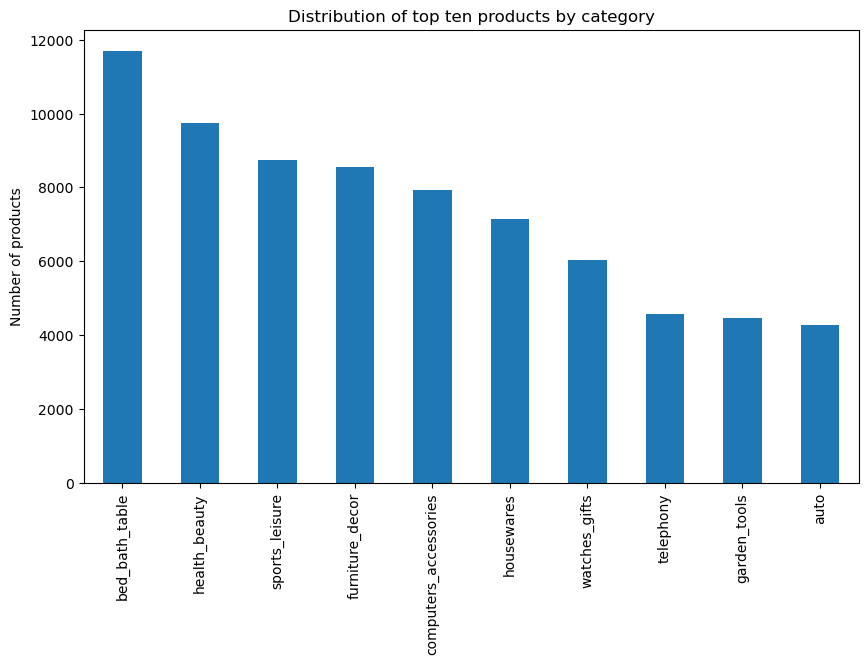

In [55]:
# Top 10 product categories
Top_10_prod = Command_df['product_category_name_english'].value_counts().nlargest(10)

# Visualize the top 10 products
plt.figure(figsize=(10,6), dpi = 100)
Top_10_prod.plot(kind = 'bar')
plt.ylabel('Number of products')
plt.title('Distribution of top ten products by category')
plt.show()  

***Distribution of customers' review scores***

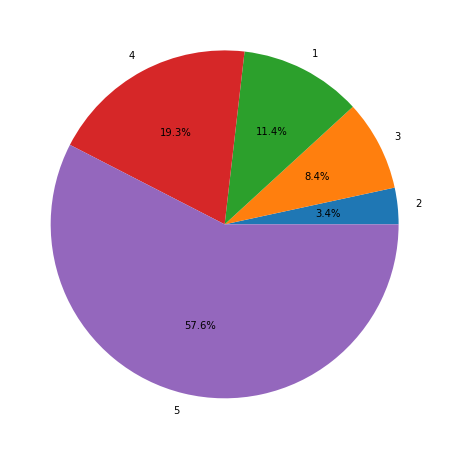

In [56]:
label = [2 , 3, 1, 4, 5]
plt.figure(figsize=(8,8))
palette = sns.color_palette('bright')
plt.pie(Command_df['review_score'].value_counts().sort_values(), labels=label, autopct='%0.1f%%')
plt.show()

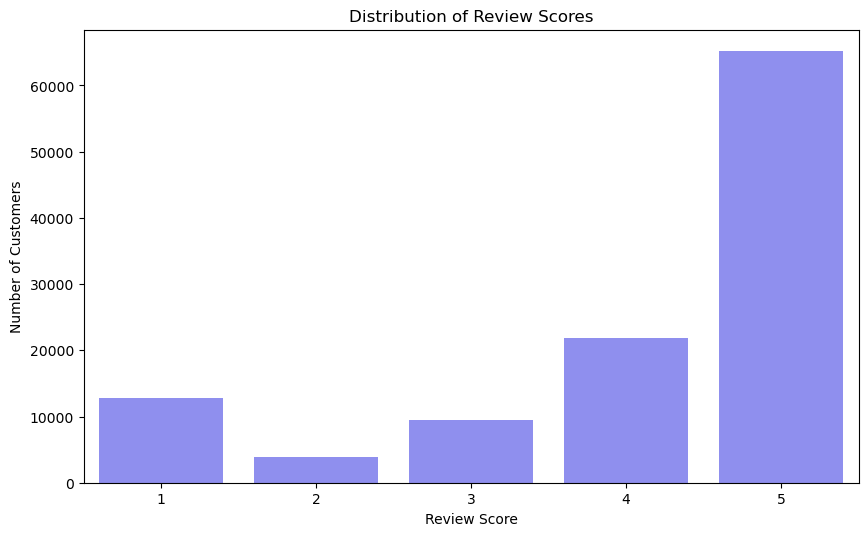

In [57]:
countplot(Command_df, 'review_score')
plt.ylabel('Number of Customers')
plt.xlabel('Review Score')
plt.title('Distribution of Review Scores')
plt.show() 

Estimate the distance between the customers and sellers 

In [58]:
cust = Customers[['customer_id', 'customer_state','customer_zip_code_prefix']]
seller = Sellers[['seller_id','seller_zip_code_prefix']]
geo_loc = Geolocation.groupby('geolocation_zip_code_prefix').mean().reset_index()

# Add customers and sellers files to the command df
Data_dist = pd.merge(Command_df,cust,how='left',on='customer_id')
Data_dist=pd.merge(Data_dist,seller,how='left',on='seller_id')

# get their locations
Data_loc = pd.merge(Data_dist, geo_loc, how='left', left_on='customer_zip_code_prefix', right_on=
                    'geolocation_zip_code_prefix').rename(columns={'geolocation_lat':'cus_lat','geolocation_lng':'cus_lng'})
Data_loc.drop(columns=['geolocation_zip_code_prefix','customer_zip_code_prefix'], axis = 1, inplace = True)

# get sellers location

Data_loc = pd.merge(Data_loc, geo_loc, how='left', left_on='seller_zip_code_prefix', right_on=
                    'geolocation_zip_code_prefix').rename(columns={'geolocation_lat':'sel_lat','geolocation_lng':'sel_lng'})
Data_loc.drop(columns=['geolocation_zip_code_prefix','seller_zip_code_prefix'], axis = 1, inplace = True)
Data_loc.dropna(axis = 0, inplace = True)

In [59]:
# calculate the distance between the seller & the buyer

R = 6372.8 # radius of the earth in kilometers (https://imagine.gsfc.nasa.gov/features/cosmic/earth_info.html)

# change series data from string to float
lat1 = Data_loc['cus_lat'].astype(float)
lat2 = Data_loc['sel_lat'].astype(float)
lon1 = Data_loc['cus_lng'].astype(float)
lon2 = Data_loc['sel_lng'].astype(float)

# convert decimal degrees to radians
dLat = np.radians(lat2 - lat1)
dLon = np.radians(lon2 - lon1)
lat1 = np.radians(lat1)
lat2 = np.radians(lat2)

# haversine formula
a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
c = 2*np.arcsin(np.sqrt(a))
distance = (R * c).round(2)

# add distance to dataframe
Data_loc['distance(km)'] = distance

#drop unnecessary columns
Command_df_f = Data_loc.drop(['cus_lat', 'sel_lat', 'cus_lng', 'sel_lng'], axis = 1)

***Distribution of customers by states***

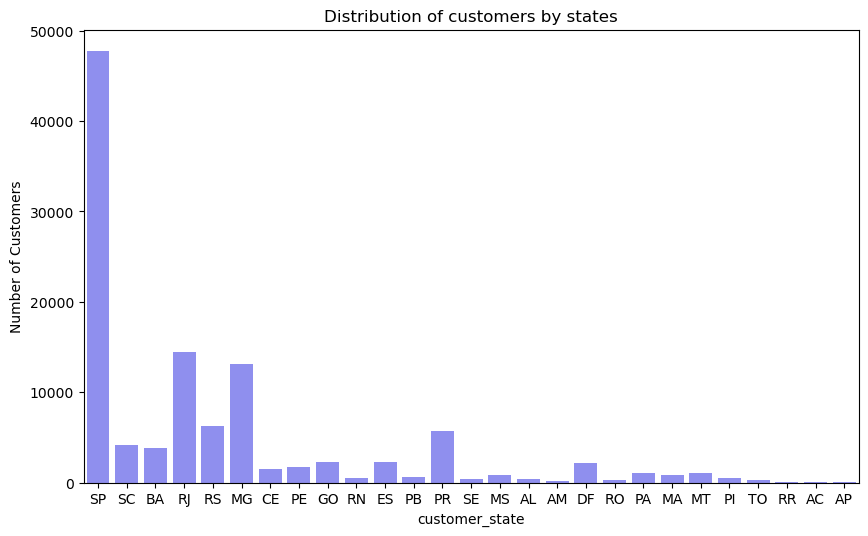

In [60]:
countplot(Command_df_f, 'customer_state')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by states')
plt.show()  

***Total amounts spent by states***

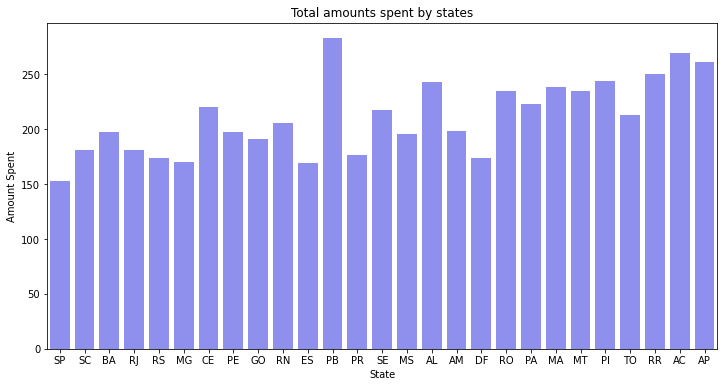

In [61]:
plt.figure(figsize=(12,6)) #set figure size
#plt.grid(False) #set the background
sns.barplot(data = Command_df_f, x = 'customer_state', y= 'payment_value', color = 'blue',
            alpha = 0.5, ci = None) # create a histogram plot
plt.ylabel('Amount Spent')
plt.xlabel('State')
plt.title('Total amounts spent by states')
plt.show()

Create final command file

In [62]:
lst = ['order_purchase_timestamp','payment_type', 'product_category_name_english', 'days_of_week', 'purchase_day', 
       'purchase_period', 'order_item_id', 'customer_state']
Command_df_f.drop(lst, axis = 1, inplace = True)

In [63]:
grp = ['order_id', 'customer_id',]
Command_final = Command_df_f.groupby(grp).agg({'price':'sum','freight_value':'sum',
                                             'payment_value': 'sum','payment_installments':'mean', 
                                             'payment_sequential':'mean',
                                             'review_score': 'mean', 'purchase_year':'mean', 'purchase_month':'mean', 
                                             'last_purchase':'min', 'delivery_days':'mean', 
                                             'delayed_delivery':'mean', 'distance(km)':'mean'}).reset_index()

### 3.2 Customers file

In [64]:
# Merge the command file with the customer's unique ID
Client_df = pd.merge(Customers[['customer_id','customer_unique_id']],Command_final, on = 'customer_id')

# drop unneccassary columns
Client_df.drop(['customer_id'], axis = 1, inplace = True)


Client_df.head(5)

,customer_unique_id,order_id,price,freight_value,payment_value,payment_installments,payment_sequential,review_score,purchase_year,purchase_month,last_purchase,delivery_days,delayed_delivery,distance(km)
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88,146.87,2.0,1.0,4.0,2017.0,5.0,474,8.0,0.0,348.87
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,289.00,46.48,335.48,8.0,1.0,5.0,2018.0,1.0,233,16.0,0.0,413.95
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,17.79,157.73,7.0,1.0,5.0,2018.0,5.0,106,26.0,1.0,29.97
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,149.94,23.36,173.30,1.0,1.0,5.0,2018.0,3.0,173,14.0,0.0,18.57
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,22.25,252.25,8.0,1.0,5.0,2018.0,7.0,35,11.0,0.0,220.11


In [65]:
Client_Final = Client_df.groupby('customer_unique_id').agg({'order_id':'count', 'price': 'sum', 'freight_value':'sum', 
            'payment_value': 'sum','review_score': 'mean', 'purchase_year':'mean', 'purchase_month':'mean', 
            'last_purchase':'min', 'payment_installments':'mean', 'payment_sequential':'mean', 
            'delivery_days':'mean', 'delayed_delivery':'mean', 'distance(km)':'mean'}).reset_index()

# Rename columns
Client_Final = Client_Final.rename(columns={"order_id": "nb_orders",  
                            "price": "Total_price", "freight_value": "total_freight",
                            "payment_value" : "Total_spent", "payment_installments": "mean_installments",
                            "last_purchase":"Recency_days",})

***Distribution of customers by number of orders***

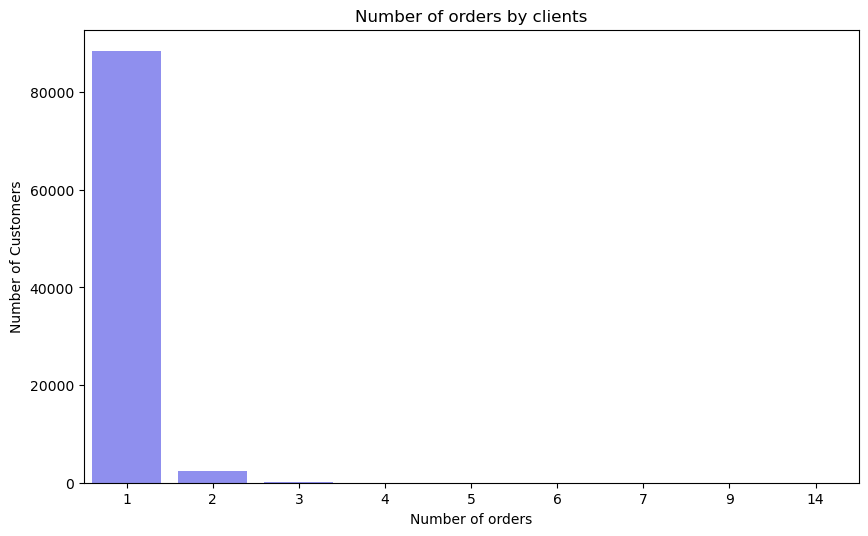

In [66]:
countplot(Client_Final, "nb_orders")
plt.xlabel('Number of orders')
plt.ylabel('Number of Customers')
plt.title('Number of orders by clients')
#ax.bar_label(ax.containers[0], label_type='edge', color='black')
plt.show()  

In [67]:
more_orders = Client_Final[Client_Final["nb_orders"] > 1]
len(more_orders)

percent_more_orders = round(len(more_orders)*100/len(Client_Final), 1)


print("Number of customers with more than 1 orders are: %.3f" % len(more_orders))
print("Percentage Number of customers with more than 1 orders is: %.3f" % percent_more_orders + '%')

Number of customers with more than 1 orders are: 2687.000
Percentage Number of customers with more than 1 orders is: 3.000%


### 3.3 Summary of Exploratory Analyses of the Datasets

***Customers:***
 - Most of the customers are from three states - SP (Sau Pauolo), RJ (Rio de Janeiro, and MG (Minas Gerais)
 - Top three spending states from are PB, AC, and AP 
 - Only 3% of the customers made order more than once

***Number of orders:***
 - Most of the orders were made on Mondays and Tuesdays with least orders during the weekends on Saturdays and Sundays
 - The highest number of orders were made in August and May with the least numbers in September and October
 - 97% of total orders were delivered 
 - The number of sales grew significantly in from October 2017 but slighly dropped from June 2018
 
***Payments:*** 
  - Only a few numbers of custromers paid in more than 10 times instalments while majority of the customers paid only one time
  - Credit card is the most preferred means of payment, followed by boleto, voucher, and then debit card. 

***Product Category:***
 - The top 10 ordered products are from the bed_bath_table, sports and leisure, furniture_decor, health_beauty, housewares, auto, computers_accessories, toys, watches_gifts, and telephony  categories

***Review Scores:***
 - Most of the customers are satisfied with a combined 4 and 5 ratings of 77 %, while those with less satisfactions are less than 15%.

## 4.0 Quality check of the final files

### 4.1 Command file

In [68]:
Command_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94019 entries, 0 to 94018
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              94019 non-null  object 
 1   customer_id           94019 non-null  object 
 2   price                 94019 non-null  float64
 3   freight_value         94019 non-null  float64
 4   payment_value         94019 non-null  float64
 5   payment_installments  94019 non-null  float64
 6   payment_sequential    94019 non-null  float64
 7   review_score          94019 non-null  float64
 8   purchase_year         94019 non-null  float64
 9   purchase_month        94019 non-null  float64
 10  last_purchase         94019 non-null  int64  
 11  delivery_days         94019 non-null  float64
 12  delayed_delivery      94019 non-null  float64
 13  distance(km)          94019 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 10.0+ MB


In [69]:
Command_final.describe()

,price,freight_value,payment_value,payment_installments,payment_sequential,review_score,purchase_year,purchase_month,last_purchase,delivery_days,delayed_delivery,distance(km)
count,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000,94019.000000
mean,143.658734,23.957501,205.640219,2.913548,1.022889,4.157502,2017.546358,6.035525,242.880397,12.040790,0.697540,601.235751
std,236.549390,25.571512,611.036355,2.698910,0.186431,1.282237,0.503394,3.220035,152.903572,9.458109,4.551664,593.369849
min,0.850000,0.000000,9.590000,0.000000,1.000000,1.000000,2016.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,47.600000,14.060000,62.815000,1.000000,1.000000,4.000000,2017.000000,3.000000,119.000000,6.000000,0.000000,188.985000
50%,89.000000,17.600000,109.590000,2.000000,1.000000,5.000000,2018.000000,6.000000,223.000000,10.000000,0.000000,434.420000
75%,154.900000,25.630000,196.350000,4.000000,1.000000,5.000000,2018.000000,8.000000,353.000000,15.000000,0.000000,798.255000
max,13440.000000,1794.960000,109312.640000,24.000000,13.500000,5.000000,2018.000000,12.000000,699.000000,208.000000,188.000000,8680.360000


In [70]:
# Duplicated order_id
Command_final.duplicated(subset=['order_id']).sum()

0

In [71]:
# Check for missing values
Command_final.isnull().sum()

order_id                0
customer_id             0
price                   0
freight_value           0
payment_value           0
payment_installments    0
payment_sequential      0
review_score            0
purchase_year           0
purchase_month          0
last_purchase           0
delivery_days           0
delayed_delivery        0
distance(km)            0
dtype: int64

### 4.2 Client file

In [72]:
# Summary of the overall data
Client_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91035 entries, 0 to 91034
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  91035 non-null  object 
 1   nb_orders           91035 non-null  int64  
 2   Total_price         91035 non-null  float64
 3   total_freight       91035 non-null  float64
 4   Total_spent         91035 non-null  float64
 5   review_score        91035 non-null  float64
 6   purchase_year       91035 non-null  float64
 7   purchase_month      91035 non-null  float64
 8   Recency_days        91035 non-null  int64  
 9   mean_installments   91035 non-null  float64
 10  payment_sequential  91035 non-null  float64
 11  delivery_days       91035 non-null  float64
 12  delayed_delivery    91035 non-null  float64
 13  distance(km)        91035 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 9.7+ MB


In [73]:
# Statistical summary of numeric features
Client_Final.describe()

,nb_orders,Total_price,total_freight,Total_spent,review_score,purchase_year,purchase_month,Recency_days,mean_installments,payment_sequential,delivery_days,delayed_delivery,distance(km)
count,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000
mean,1.032779,148.367666,24.742795,212.380817,4.154911,2017.548511,6.037375,240.741934,2.901808,1.022655,12.050488,0.702661,602.557026
std,0.205922,244.023009,27.085892,632.450459,1.278866,0.501487,3.205117,152.643978,2.677991,0.183189,9.457706,4.574737,593.863139
min,1.000000,0.850000,0.000000,9.590000,1.000000,2016.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,48.900000,14.100000,63.740000,4.000000,2017.000000,3.000000,117.000000,1.000000,1.000000,6.000000,0.000000,191.285000
50%,1.000000,89.900000,17.710000,112.760000,5.000000,2018.000000,6.000000,222.000000,2.000000,1.000000,10.000000,0.000000,435.610000
75%,1.000000,159.900000,26.610000,202.760000,5.000000,2018.000000,8.000000,349.000000,4.000000,1.000000,15.000000,0.000000,799.600000
max,14.000000,13440.000000,1794.960000,109312.640000,5.000000,2018.000000,12.000000,699.000000,24.000000,13.500000,208.000000,188.000000,8680.360000


In [74]:
# Duplicated order_id
Client_Final.duplicated(subset=['customer_unique_id']).sum()

0

In [75]:
# Check for missing values
Client_Final.isnull().sum()

customer_unique_id    0
nb_orders             0
Total_price           0
total_freight         0
Total_spent           0
review_score          0
purchase_year         0
purchase_month        0
Recency_days          0
mean_installments     0
payment_sequential    0
delivery_days         0
delayed_delivery      0
distance(km)          0
dtype: int64

## 5.0 Save files for modelings
 - save the command files for customers' segmentation and simulation of cluster stability, respectively

In [76]:
# Export and save the order and client dataframes to csv file for cluster analysis and modeling
Client_Final.to_csv("Client_df.csv", index = False)
Command_final.to_csv("Command_df.csv", index = False)
Client_df.to_csv("Command_df2.csv", index = False)